# Импорт библиотек

In [6]:
from random import uniform
from random import random
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import time

plt.rcParams['figure.figsize'] = 8, 8    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True           # Сетка графика
plt.pink()                                 # Цветовая схема при раскраске

<Figure size 800x800 with 0 Axes>

# Тестовые функции для оптимизации

In [2]:
@njit
def rastrigin(x: np.ndarray):  # функция Растригина от -5.12 до 5.12
    a = 10
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2 - a * np.cos(2 * np.pi * x[i])

    return a * n + result

@njit
def sphere(x: np.ndarray):   # функция Сферы
    result = 0
    n = x.size
    for i in range(n):
        result += x[i] ** 2
    return result

@njit
def rozenbroke(x: np.ndarray):  # Функция Розенброка, минимум в точке f(1;1) = 0
    result = 0
    n = x.size
    for i in range(n - 1):
        result += (100 * x[i+1] - x[i] ** 2) ** 2 + (x[i] - 1) ** 2
    return result

# Реализация метода роя частиц на Python с использованием numba

In [26]:
@njit
def main(v_max: float, dimension: int, f):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    # dimension = 2  # размерность
    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if j == 0:
            px_list = np.copy(coordinates)
            py_list = np.array([p])
        else:
            px_list = np.append(px_list, coordinates)
            py_list = np.append(py_list, p)

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        if j == 0:
            best_solution = np.array([p_global_best])
            best_coord = np.copy(p_best_coordinates)
        else:
            best_solution = np.append(best_solution, p_global_best)
            best_coord = np.append(best_coord, p_best_coordinates)
    print("global_best:", p_global_best, "coordinates:", p_best_coordinates)
    # print("Размерности совпадают: ", px_list.shape == py_list.shape)
    return [px_list, py_list], [best_coord, best_solution]

In [27]:
list_of_all = main(1.154, 2, rastrigin)
list_of_x = list_of_all[0][0]
list_of_y = list_of_all[0][1]
list_of_best_coord = list_of_all[1][0]
list_of_best_solution = list_of_all[1][1]

global_best: 0.007753317342125143 coordinates: [0.00625186]


[ 0.10092649  3.44281581 -3.66721958  2.1402169  -4.60989578 -0.23799184
  1.73023362  4.25788768  0.35780467 -2.63605232 -3.18527574 -3.74701699
  3.648463   -4.77797316 -4.15653903  0.07027209  2.26499672  0.54781366
 -1.20334277  1.06160448  3.28629642 -4.76463505  3.6270198  -1.42841788
  4.47586639  3.36379024 -4.23897132  4.08542006 -3.22677318  4.03513831
  3.35699245 -2.42545806 -4.75375832 -3.81662811  0.6061441  -3.157115
 -1.68131133  1.47939007 -4.0025303   2.54530581 -2.61400368 -2.27994366
 -3.59236898 -1.58610976  0.89339355 -2.41902879 -1.27746532  3.09027721
  3.80898412  1.26582101] 
 [1.95436973e+00 3.12144165e+01 1.41357758e+00 8.21679499e+00
 7.39149134e-03 6.19665876e+00 1.08496238e+01 2.86250025e+01
 4.41405867e+00 3.99945836e+00 3.59816278e+00 3.95638030e+00
 2.92669883e+01 9.96663092e-01 7.61375460e+00 9.63959917e-01
 1.60710884e+01 1.19862858e+01 1.66836627e+00 1.86682251e+00
 2.30605984e+01 1.01643962e+00 3.01360361e+01 3.50197714e+00
 3.99186328e+01 2.787099

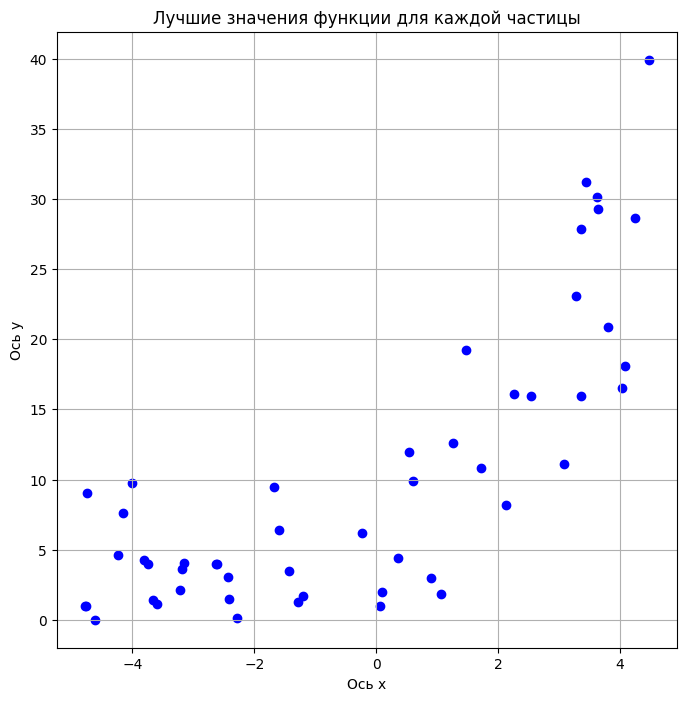

In [5]:
print(list_of_x, "\n", list_of_y)

plt.scatter(list_of_x, list_of_y, c = 'b', label = 'local min for each agent')
plt.xlabel("Ось x")
plt.ylabel("Ось y")
plt.title("Лучшие значения функции для каждой частицы")
plt.show()

[0.10092649 0.10092649 0.94878042 0.94878042 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422 0.00610422
 0.00610422 0.00610422] 
 [1.95436973 1.95436973 1.41357758 1.41357758 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149 0.00739149
 0.00739149 0.00739149 0.00739149 0.

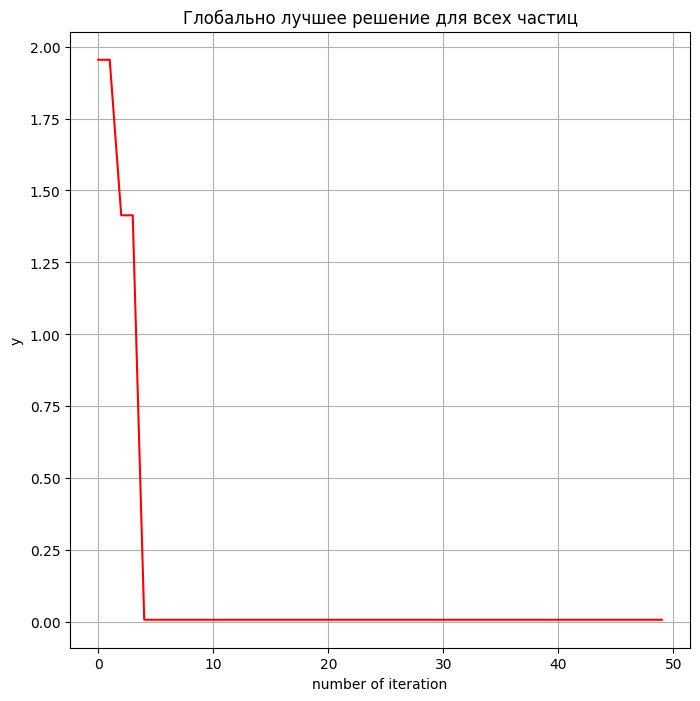

In [6]:
print(list_of_best_coord, "\n", list_of_best_solution)

plt.plot(np.arange(list_of_best_solution.size), list_of_best_solution, c = 'r')
plt.xlabel("number of iteration")
plt.ylabel("y")
plt.title("Глобально лучшее решение для всех частиц")
plt.show()

# Тестирование функций для оптимизации

global_best: 0.014909813529063953 coordinates: [0.00867017]
global_best: 0.9053995305945328 coordinates: [0.06807009]
global_best: 0.02192729420088746 coordinates: [0.01051499]
global_best: 0.21136930892175698 coordinates: [0.03269783]
global_best: 0.012742389352311534 coordinates: [-0.0080151]
global_best: 0.01464671460863265 coordinates: [-0.00859331]
global_best: 0.028771515340533682 coordinates: [-0.01204543]
global_best: 0.0030590357091799802 coordinates: [-0.00392682]
global_best: 0.0008340517832934324 coordinates: [-0.00205039]
global_best: 0.008850998149261713 coordinates: [-0.00667983]


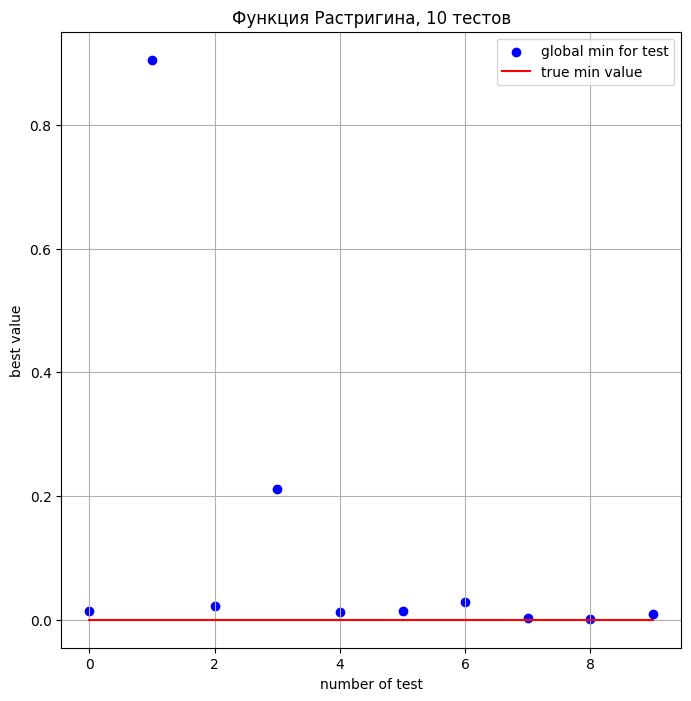

In [7]:
def draw(f, title: str):

    for i in range(10):
        list_of_best_x, list_of_best_y = main(1.154, f)[1]

        y = list_of_best_y[len(list_of_best_y) - 1]

        if i == 0:
            plt.scatter(i, y, c = 'b', label = 'global min for test')
            plt.plot(np.arange(10), np.zeros(10), c = 'r', label = 'true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c = 'b')

    plt.title(title)
    plt.show()

draw(rastrigin, "Функция Растригина, 10 тестов")

global_best: 0.06451858263340426 coordinates: [-0.01804312]
global_best: 0.014324397695297364 coordinates: [-0.00849821]
global_best: 0.015439500061058098 coordinates: [0.00882287]
global_best: 0.1757042910219706 coordinates: [0.02980304]
global_best: 0.04771112065983729 coordinates: [-0.01551382]
global_best: 0.0027047391171226565 coordinates: [0.00369241]
global_best: 0.244385081082525 coordinates: [0.03516856]
global_best: 0.06795946182536383 coordinates: [-0.01851853]
global_best: 0.0015632287647768806 coordinates: [0.00280708]
global_best: 0.017261242368126872 coordinates: [-0.00932901]


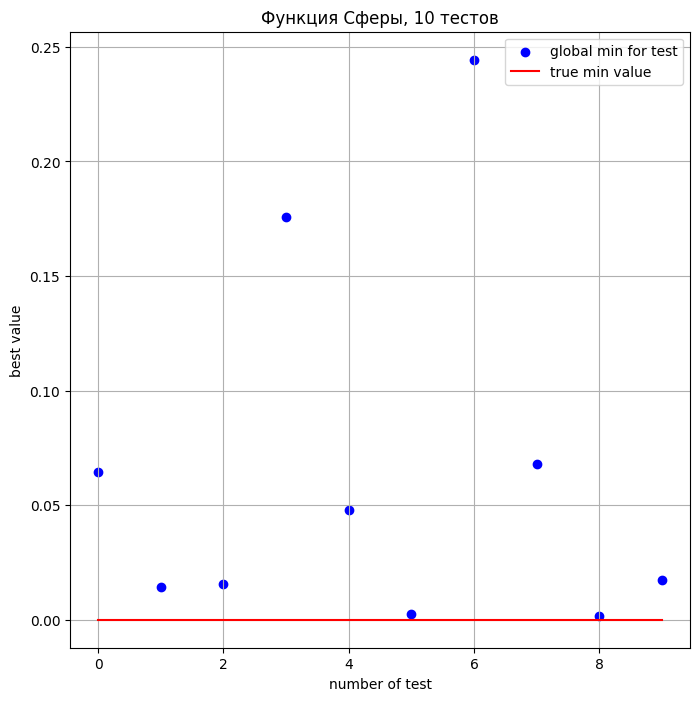

In [12]:
draw(rastrigin, "Функция Сферы, 10 тестов")

global_best: 0.0 coordinates: [-0.85506233]
global_best: 0.0 coordinates: [-1.69145198]
global_best: 0.0 coordinates: [1.83125296]
global_best: 0.0 coordinates: [-0.54884075]
global_best: 0.0 coordinates: [4.71263082]
global_best: 0.0 coordinates: [4.97555215]
global_best: 0.0 coordinates: [4.15069889]
global_best: 0.0 coordinates: [-0.80420259]
global_best: 0.0 coordinates: [1.4803489]
global_best: 0.0 coordinates: [3.05151314]


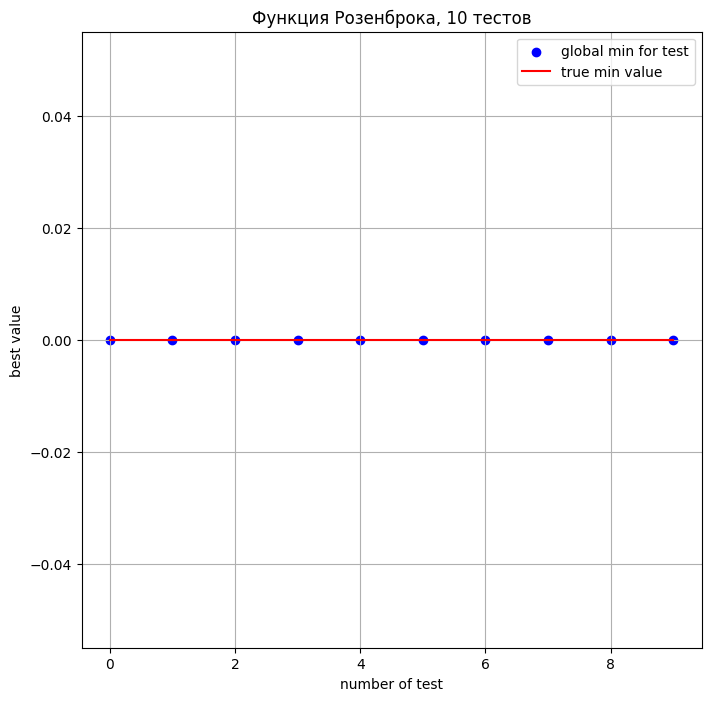

In [9]:
draw(rozenbroke, "Функция Розенброка, 10 тестов")

# Реализация метода роя частиц на C. Сравнение двух реализаций

In [2]:
import ctypes
import os

class Result(ctypes.Structure):
    _fields_ = [
        ("best_solution", ctypes.POINTER(ctypes.c_float)),
        ("best_y", ctypes.c_float),
        ("time_spent", ctypes.c_double)
    ]

def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


test_rastrigin = c("libcode.dll", "test_rastrigin", (ctypes.c_int, ctypes.c_float), Result)
test_sphere = c("libcode.dll", "test_sphere", (ctypes.c_int, ctypes.c_float), Result)
test_rozenbroke = c("libcode.dll", "test_rozenbroke", (ctypes.c_int, ctypes.c_float), Result)

dimension = 2
v_max = 1.134

result = test_rastrigin(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)



result = test_sphere(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)



result = test_rozenbroke(dimension, v_max)
print("best:", result.best_y)
print("Time is", result.time_spent)

best_solution = [result.best_solution[i] for i in range(dimension - 1)]
print("Coordinates:", best_solution)

best: 8.58306884765625e-05
Time is 0.023
Coordinates: [0.0006563663482666016]
best: 1.4936409797883243e-07
Time is 0.017
Coordinates: [0.0003864765167236328]
best: 0.0
Time is 0.02
Coordinates: [-3.3505709171295166]


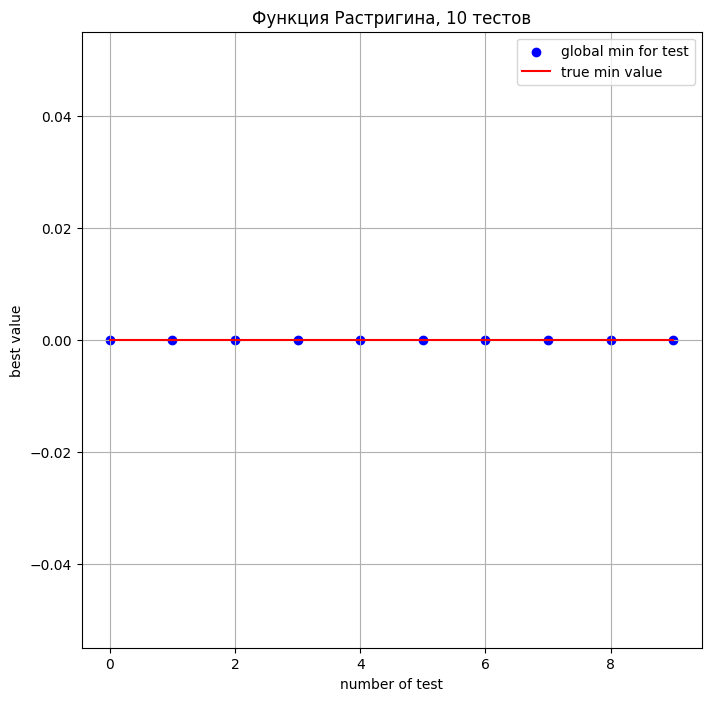

In [3]:
def draw_c(f, title: str):
    dimension = 2
    v_max = 1.134

    for i in range(10):
        y = f(dimension, v_max).best_y

        if i == 0:
            plt.scatter(i, y, c = 'b', label = 'global min for test')
            plt.plot(np.arange(10), np.zeros(10), c = 'r', label = 'true min value')
            plt.legend()
            plt.xlabel("number of test")
            plt.ylabel("best value")
        else:
            plt.scatter(i, y, c = 'b')

    plt.title(title)
    plt.show()

draw_c(test_rastrigin, "Функция Растригина, 10 тестов")

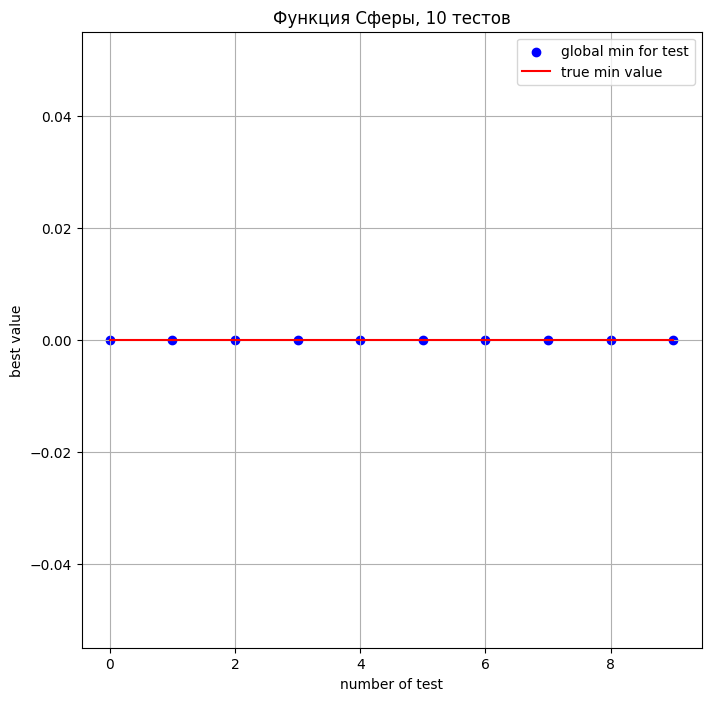

In [4]:
draw_c(test_sphere, "Функция Сферы, 10 тестов")

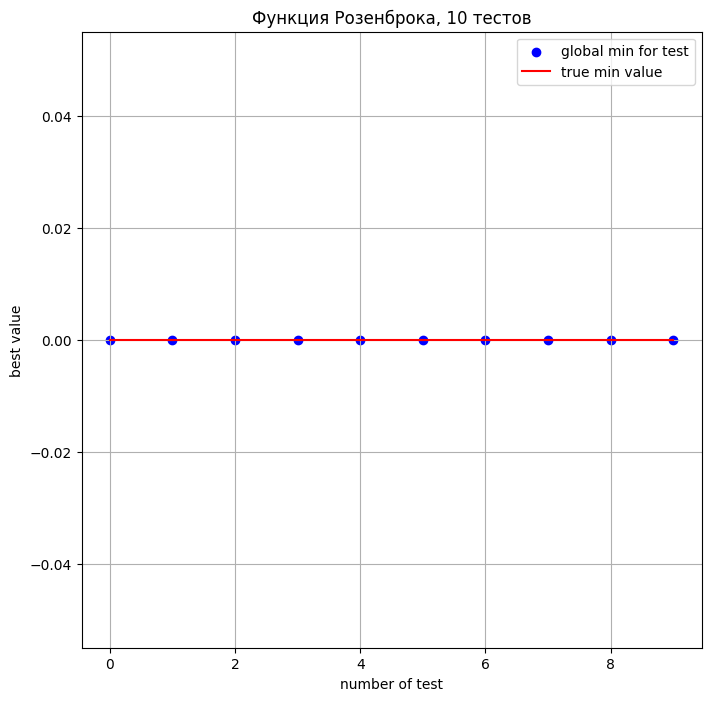

In [5]:
draw_c(test_rozenbroke, "Функция Розенброка, 10 тестов")

<h3>Сравнение реализаций по скорости выполнения</h3>

In [37]:
@njit
def running_on_time(v_max: float, dimension: int, f):
    px_list: np.ndarray
    py_list: np.ndarray
    best_solution: np.ndarray
    best_coord: np.ndarray

    r1 = np.random.rand(dimension - 1)
    r2 = np.random.rand(dimension - 1)
    weight = 3.4
    p_global_best = 1000.0
    p_best_coordinates = np.zeros(dimension - 1)

    for j in range(50):
        coordinates = np.random.uniform(-5.12, 5.12, dimension - 1)
        c1 = random()
        c2 = random()
        p_coordinates_now = np.copy(coordinates)
        p_coordinates = np.copy(coordinates)
        p = f(coordinates)
        array_of_speed = np.zeros((400, dimension - 1))

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

        for k in range(dimension - 1):
            array_of_speed[0][k] = uniform(-1 * v_max, v_max)

        for i in range(1, len(array_of_speed)):
            array_of_speed[i] = array_of_speed[i - 1] * weight + \
                                c1 * r1 * (p_best_coordinates - p_coordinates_now) + \
                                c2 * r2 * (p_best_coordinates - p_coordinates_now)

            for k in range(dimension - 1):
                if array_of_speed[i][k] > 0:
                    array_of_speed[i][k] = min(array_of_speed[i][k], v_max)
                else:
                    array_of_speed[i][k] = max(array_of_speed[i][k], v_max)

            p_coordinates_now = p_coordinates_now + array_of_speed[i]

            if p > f(p_coordinates_now):
                p = f(p_coordinates_now)
                p_coordinates = p_coordinates_now

        if p_global_best > p:
            p_best_coordinates = p_coordinates
            p_global_best = p

    return p_best_coordinates, p_global_best

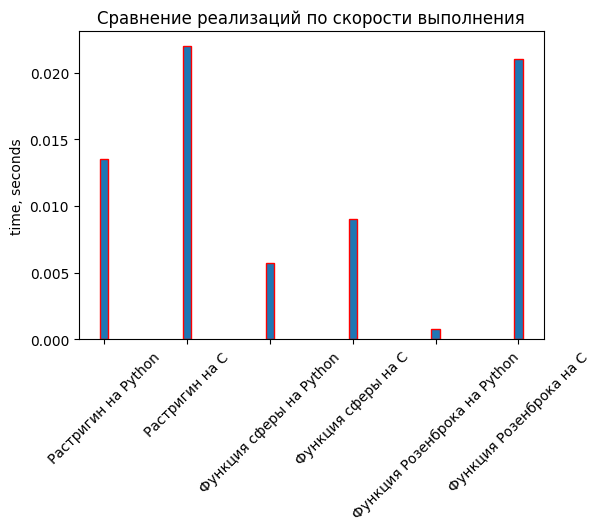

In [78]:
def time_remember(f):
    start = time.time()
    running_on_time(v_max, dimension, f)
    end = time.time() - start
    return end

dimension = 2
v_max = 1.134

time_rastrigin_on_c = test_rozenbroke(dimension, v_max).time_spent
time_sphere_on_c = test_sphere(dimension, v_max).time_spent
time_rozenbroke_on_c = test_rozenbroke(dimension, v_max).time_spent

time_rastrigin_on_python = time_remember(rastrigin)
time_sphere_on_python = time_remember(sphere)
time_rozenbroke_on_python = time_remember(rozenbroke)

plt.rcParams['axes.grid'] = False
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

list_to_draw = [time_rastrigin_on_python, time_rastrigin_on_c,
                time_sphere_on_python, time_sphere_on_c,
                time_rozenbroke_on_python, time_rozenbroke_on_c]
list_of_title = ['Растригин на Python', 'Растригин на C',
                 'Функция сферы на Python', 'Функция сферы на C',
                 'Функция Розенброка на Python', 'Функция Розенброка на С']

ax.bar(list_of_title, list_to_draw, width = 0.1, edgecolor='r')

plt.ylabel("time, seconds")
plt.title("Сравнение реализаций по скорости выполнения")
plt.xticks(rotation=45)
plt.show()